# Task 1: <font color="#338CFF">Iris Flower Species Prediction</font>

---

## Contribution: <font color="#b30000">Rajesh Patil (Individual)</font>

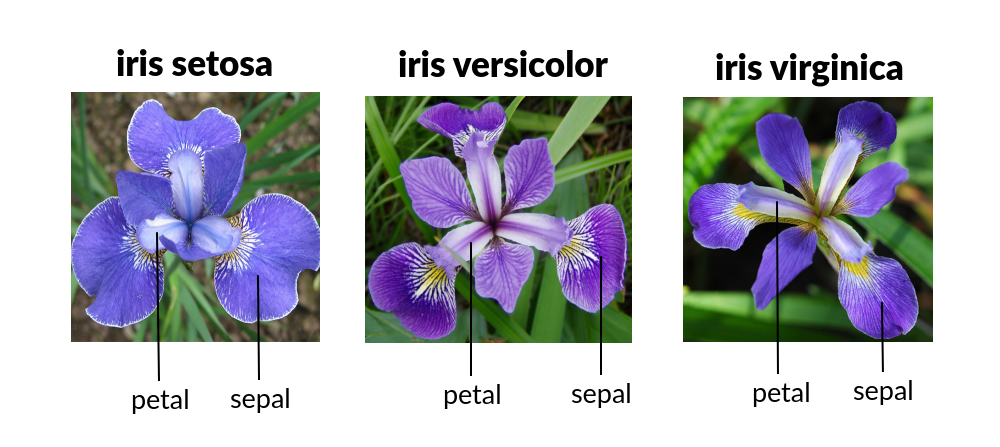

## <font color="#b30000">Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

## <font color="#b30000">Load and Explore the Dataset</font>

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Check for duplicates
duplicates = iris_df.duplicated()
if duplicates.sum() > 0:
    print(f"\033[1mWarning:\033[0m {duplicates.sum()} duplicate rows found. Removing duplicates.")
    iris_df = iris_df.drop_duplicates()

In [8]:
# Check for missing values
missing_values = iris_df.isnull().sum()
if missing_values.sum() > 0:
    print(f"\033[1mWarning:\033[0m Missing values found. Handling missing values.")
    iris_df = iris_df.dropna()

## <font color="#b30000">Visualize the Data during EDA</font>

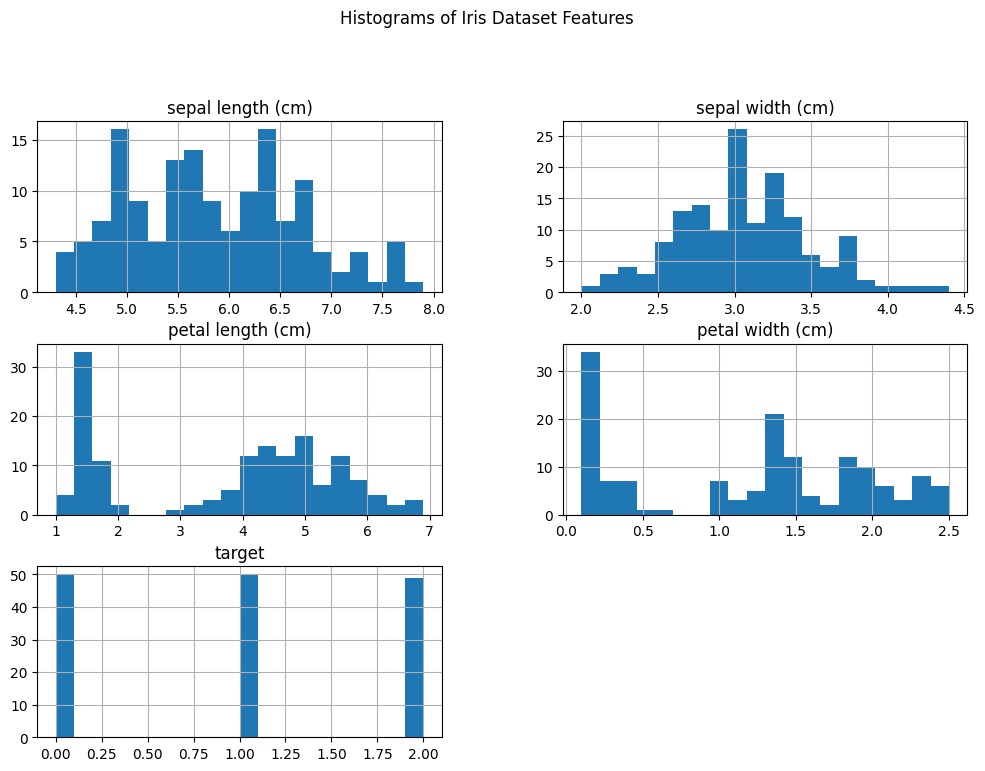

In [9]:
# Histograms
iris_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Iris Dataset Features', y=1.02)
plt.show()

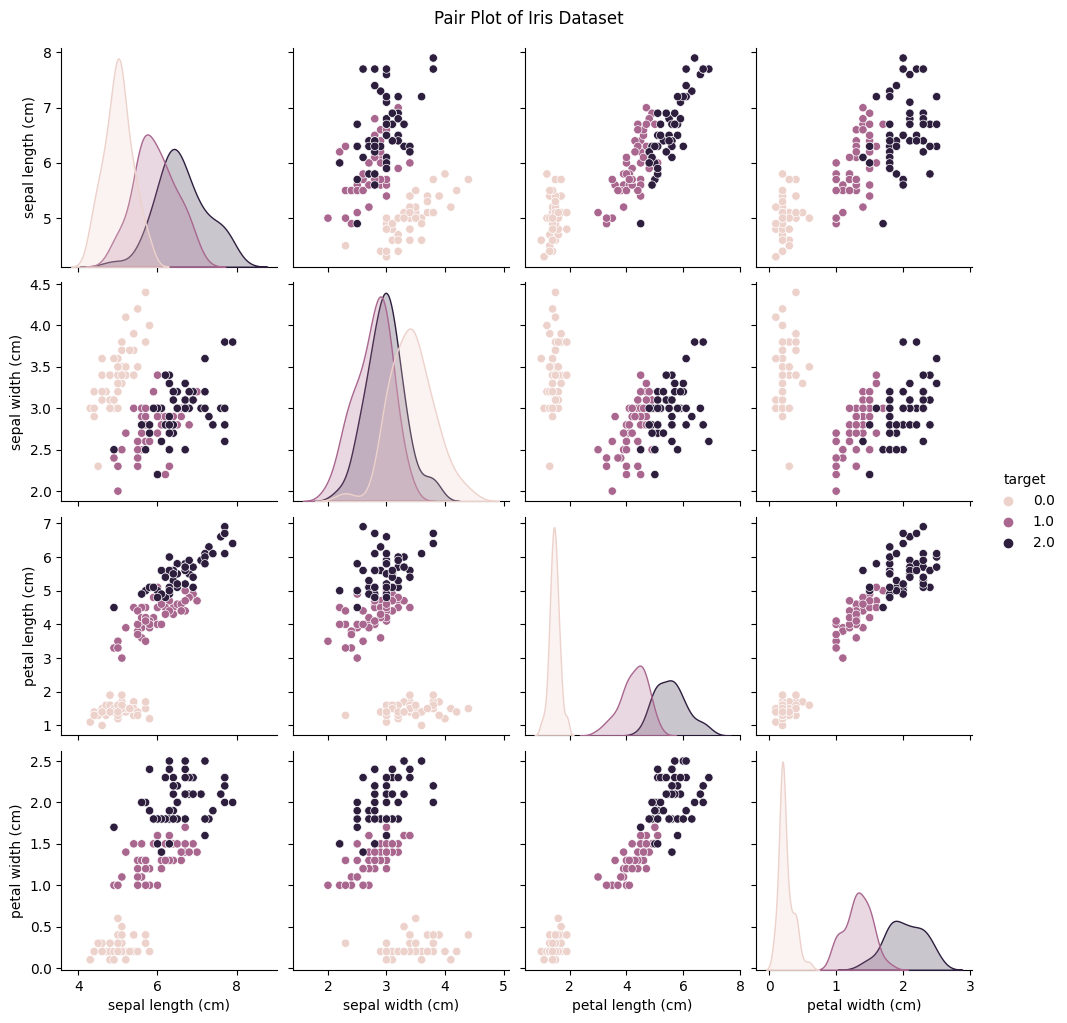

In [10]:
# Pair Plot
sns.pairplot(iris_df, hue='target', height=2.5)
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

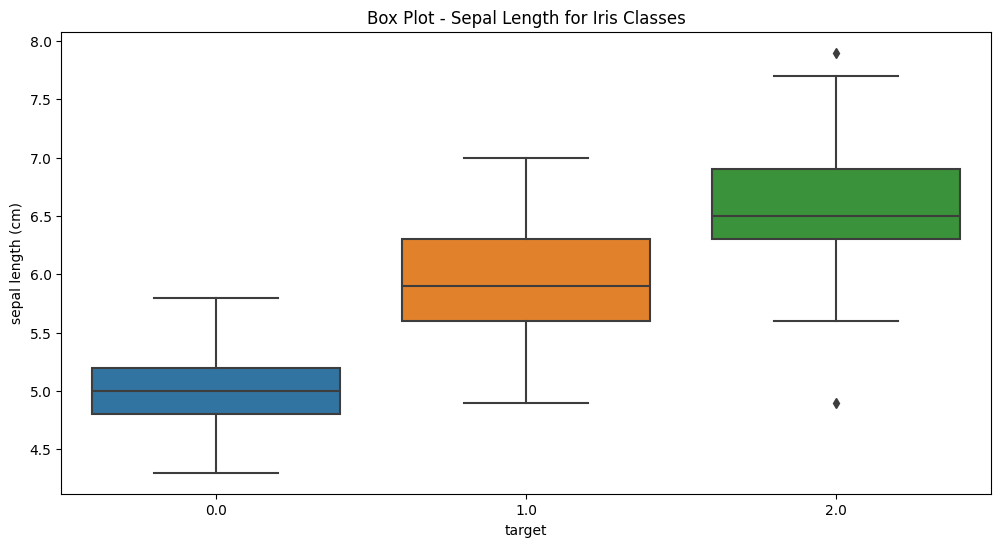

In [11]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Box Plot - Sepal Length for Iris Classes')
plt.show()

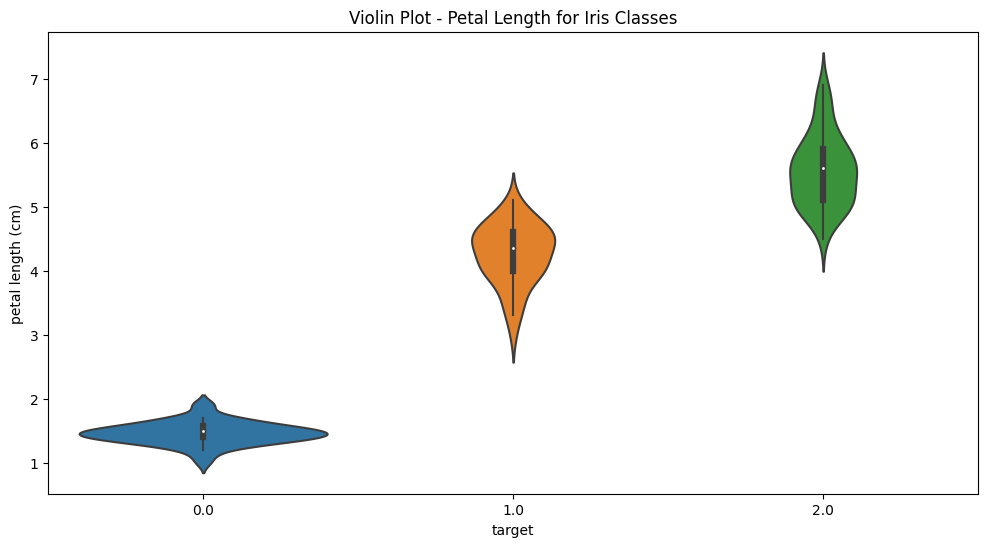

In [12]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='target', y='petal length (cm)', data=iris_df)
plt.title('Violin Plot - Petal Length for Iris Classes')
plt.show()

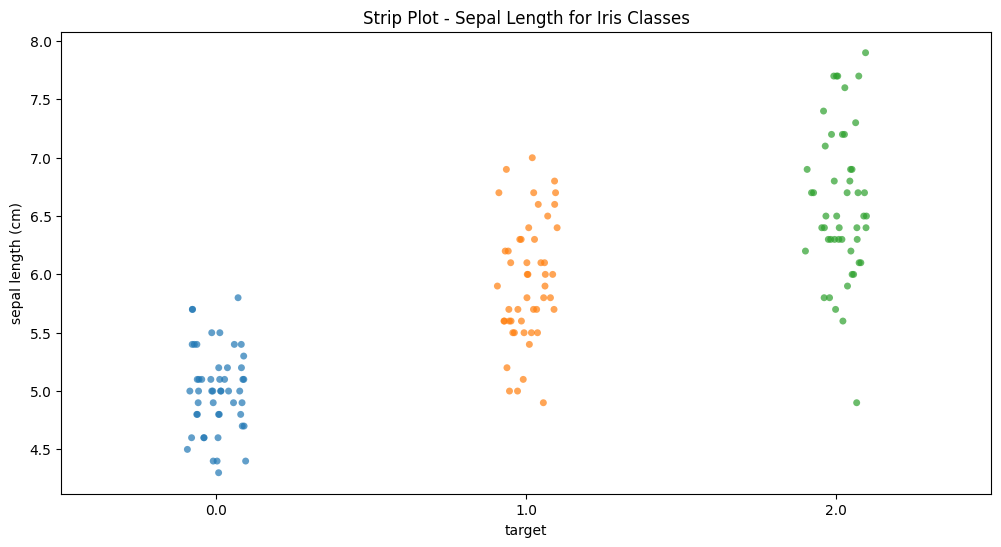

In [13]:
# Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='target', y='sepal length (cm)', data=iris_df, jitter=True, alpha=0.7)
plt.title('Strip Plot - Sepal Length for Iris Classes')
plt.show()

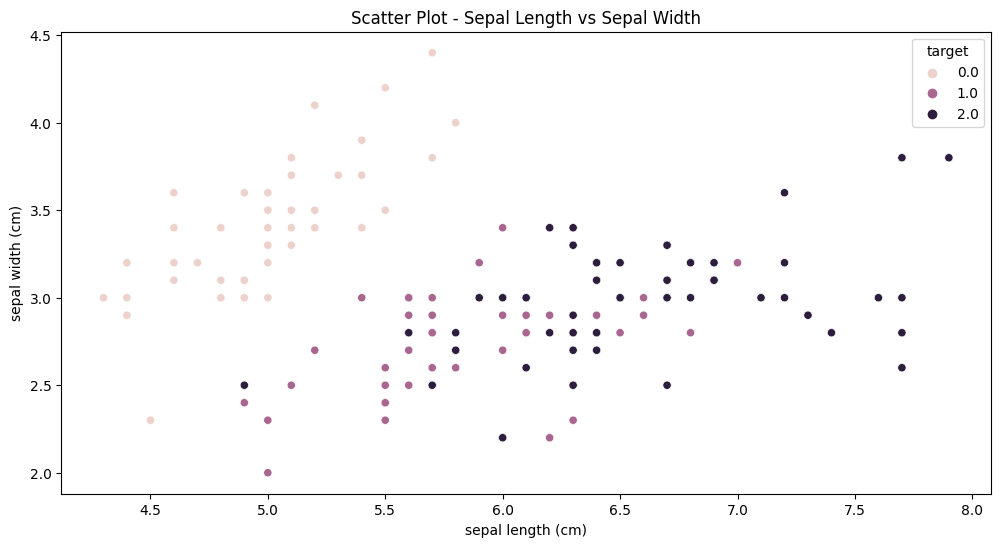

In [14]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=iris_df)
plt.title('Scatter Plot - Sepal Length vs Sepal Width')
plt.show()

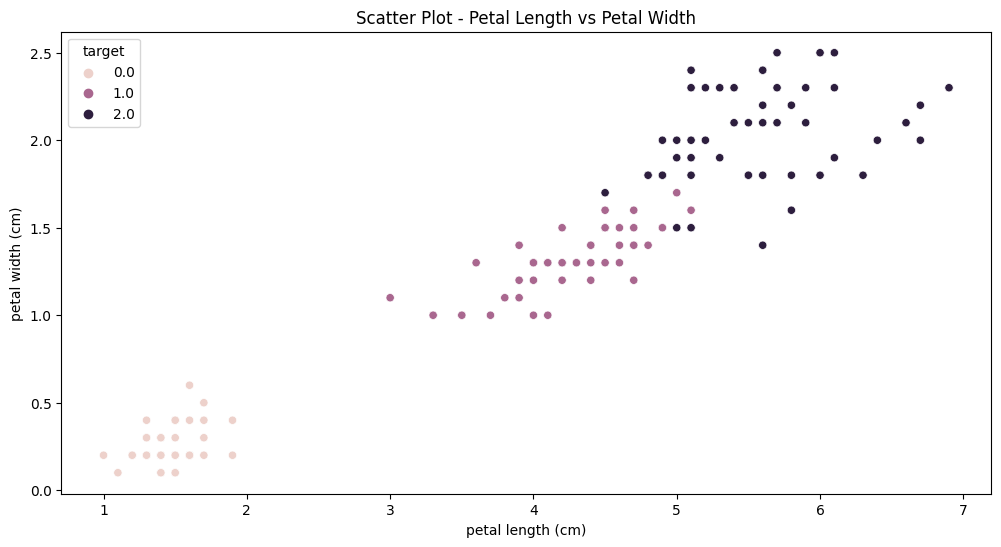

In [15]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=iris_df)
plt.title('Scatter Plot - Petal Length vs Petal Width')
plt.show()

 ## <font color="#b30000">Split the Data into Training and Testing Sets</font>

In [16]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color="#b30000">Standardize the Data</font>

In [17]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.sparse import issparse

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <font color="#b30000">Build and Train the Models</font>

In [19]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Neural Network (Multi-layer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

## <font color="#b30000">Evaluate the Models</font>

In [20]:
models = [knn_model, dt_model, rf_model, svm_model, lr_model, gb_model, mlp_model]
model_names = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine',
               'Logistic Regression', 'Gradient Boosting', 'Neural Network (MLP)']

results = {'Model': [], 'Accuracy': [], 'Confusion Matrix': [], 'Classification Report': []}

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Confusion Matrix'].append(conf_matrix)
    results['Classification Report'].append(class_report)

for model, name in zip(models, model_names):
    evaluate_model(model, X_test, y_test, name)

## <font color="#b30000">Display Results</font>

In [21]:
results_df = pd.DataFrame(results)
print("\n\033[1mResults Summary:\033[0m")
print(results_df)
print("-"*80)

# Display detailed Classification Reports
for name, report in zip(results_df['Model'], results_df['Classification Report']):
    print(f"\033[1m\nDetailed Classification Report for {name}:\033[0m\n{report}")
    print("-"*80)


Results Summary:
                    Model  Accuracy                     Confusion Matrix  \
0     K-Nearest Neighbors       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
1           Decision Tree       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
2           Random Forest       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
3  Support Vector Machine       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
4     Logistic Regression       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
5       Gradient Boosting       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   
6    Neural Network (MLP)       1.0  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-sc

In [22]:
import pandas as pd
from tabulate import tabulate

# Provided Results
results_data = {
    '\033[1mModel\033[0m': ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine',
              'Logistic Regression', 'Gradient Boosting', 'Neural Network (MLP)'],
    '\033[1mAccuracy\033[0m': [1.0, 1.0, 1.0, 0.966667, 1.0, 1.0, 1.0],
    '\033[1mConfusion Matrix\033[0m': [
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]],
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]],
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]],
        [[10, 0, 0], [0, 8, 1], [0, 0, 11]],
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]],
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]],
        [[10, 0, 0], [0, 9, 0], [0, 0, 11]]
    ],
    '\033[1mClassification Report\033[0m': [
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ...",
        "precision    recall  f1-score   ..."
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Display the DataFrame using tabulate
print("\n\033[1mResults Summary:\033[0m")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


Results Summary:
+------------------------+----------+-------------------------------------+-------------------------------------+
|         Model          | Accuracy |          Confusion Matrix           |        Classification Report        |
+------------------------+----------+-------------------------------------+-------------------------------------+
|  K-Nearest Neighbors   |   1.0    | [[10, 0, 0], [0, 9, 0], [0, 0, 11]] | precision    recall  f1-score   ... |
|     Decision Tree      |   1.0    | [[10, 0, 0], [0, 9, 0], [0, 0, 11]] | precision    recall  f1-score   ... |
|     Random Forest      |   1.0    | [[10, 0, 0], [0, 9, 0], [0, 0, 11]] | precision    recall  f1-score   ... |
| Support Vector Machine | 0.966667 | [[10, 0, 0], [0, 8, 1], [0, 0, 11]] | precision    recall  f1-score   ... |
|  Logistic Regression   |   1.0    | [[10, 0, 0], [0, 9, 0], [0, 0, 11]] | precision    recall  f1-score   ... |
|   Gradient Boosting    |   1.0    | [[10, 0, 0], [0, 9, 0], [0, 0, 1

## <font color="#b30000">Save the model</font>

In [23]:
import joblib
joblib.dump(rf_model, 'iris_random_forest_model.joblib')

['iris_random_forest_model.joblib']

## <font color="#b30000">Define a function for making predictions</font>

In [24]:
# Load the pre-trained model
loaded_model = joblib.load('iris_random_forest_model.joblib')

# Define the prediction function
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Ensure the input values are in the correct format
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Use the loaded model to make predictions
    predictions = loaded_model.predict(input_data)

    # Convert the prediction array to a list of integers
    predictions = predictions.astype(int).tolist()

    # Check if the predictions are valid indices
    if any(not (0 <= pred < len(iris.target_names)) for pred in predictions):
        return "Invalid prediction", None  # Return None for the image if prediction is invalid

    # Get the predicted species
    species = iris.target_names[predictions[0]]

    # Get the corresponding image path based on the prediction index
    image_path = f"{species.lower()}_{predictions[0] + 1}.png"  # Assuming images are named setosa_1.png, versicolor_2.png, virginica_3.png, etc.

    return species, gr.Image(image_path)

## <font color="#b30000">Create a Gradio Interface</font>

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [26]:
import gradio as gr

iface = gr.Interface(
    fn=predict_species,
    inputs=["number", "number", "number", "number"],
    outputs=["text", "image"],  # Specify "text" and "image" components as outputs
    title="Iris Flower Species Prediction",
    description="Enter the sepal length, sepal width, petal length, and petal width to predict the iris flower species."
)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
